In [264]:
import pandas as pd

df = pd.read_csv('fetal_health.csv')

# EDA and Preprocessing

In [265]:
print(df.isnull().sum())

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [266]:
print(df['fetal_health'].value_counts())

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64


**Unbalanced classes with high probabilistic output for Class 1, so I am going to use Naive-Bayes Classifier**

**Use Min-Max Scaler so all data between [0,1]**

In [267]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()

feature_df = df.drop(columns='fetal_health', axis=1)

normalized_feature_df = pd.DataFrame(normalizer.fit_transform(feature_df), columns=feature_df.columns)

normalized_feature_df.reset_index()

normalized_feature_df.tail()

c:\Users\colby\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\colby\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\colby\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\colby\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
2121,0.629630,0.000000,0.000000,0.466667,0.0,0.0,0.0,0.893333,0.000000,0.274725,...,0.209040,0.798165,0.474138,0.222222,0.0,0.732283,0.706422,0.688073,0.007435,0.5
2122,0.629630,0.052632,0.000000,0.466667,0.0,0.0,0.0,0.880000,0.029412,0.241758,...,0.355932,0.486239,0.405172,0.333333,0.0,0.724409,0.688073,0.678899,0.011152,1.0
2123,0.629630,0.052632,0.000000,0.466667,0.0,0.0,0.0,0.893333,0.029412,0.219780,...,0.361582,0.486239,0.413793,0.277778,0.0,0.732283,0.688073,0.688073,0.014870,1.0
2124,0.629630,0.052632,0.000000,0.400000,0.0,0.0,0.0,0.880000,0.029412,0.296703,...,0.355932,0.486239,0.405172,0.333333,0.0,0.724409,0.678899,0.678899,0.014870,1.0
2125,0.666667,0.105263,0.004158,0.533333,0.0,0.0,0.0,0.826667,0.029412,0.395604,...,0.220339,0.614679,0.318966,0.111111,0.1,0.669291,0.642202,0.623853,0.003717,0.5


# Logistic Regression Base Model

In [268]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

base_model_dict = {}

health_fea = normalized_feature_df.values

health_result = df['fetal_health'].values

clf = LogisticRegression(penalty='l2', solver='lbfgs')

X_training_val, X_testing, y_training_val, y_testing = train_test_split(health_fea, health_result, test_size=0.25)
    
clf.fit(X_training_val, y_training_val)
        
f1_scores = cross_val_score(clf, X_testing, y_testing, cv=10, scoring='f1_macro')
    
print(f'Macro F1 Score: {max(f1_scores).round(3)}')

base_model_dict['Logistic Regression'] = max(f1_scores).round(3)

Macro F1 Score: 0.889


# Naive Bayes Base Classifier Model

In [269]:
from sklearn.naive_bayes import ComplementNB, GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score

classifier_list= [ComplementNB(), GaussianNB()]

for clf in classifier_list:

    name = clf.__class__.__name__
    
    X_training_val, X_testing, y_training_val, y_testing = train_test_split(health_fea, health_result, test_size=0.25)

    clf.fit(X_training_val, y_training_val)

    f1_scores = cross_val_score(clf, X_testing, y_testing, cv=10, scoring='f1_macro')

    print(f'{name} Classifier Macro F1 Score:',max(f1_scores).round(3))

    base_model_dict[name] = max(f1_scores).round(3)
       


ComplementNB Classifier Macro F1 Score: 0.83
GaussianNB Classifier Macro F1 Score: 0.765


# Select Most Important Features Then Reclassify

In [270]:
df.corr().style.background_gradient()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,-0.032091,-0.147679,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,-0.142363,0.298631,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,0.011047,0.162790,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,-0.066058,0.142541,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,-0.242932,0.520467,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,-0.037667,0.044880,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,-0.226514,0.265391,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,-0.315105,-0.260463,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,0.073892,0.660847,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,-0.171114,-0.451297,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


**Prolongued Decelerations, Abnormal Short Term Variability, and Percentage of Time with Abnormal Long Term Variability have greatest positive correlation with fetal health. Select these 3 features for new model**

In [271]:
selected_features = ['prolongued_decelerations',
                    'abnormal_short_term_variability',
                    'percentage_of_time_with_abnormal_long_term_variability']

select_features_df = df[selected_features]

select_features_df.describe()

,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability
count,2126.000000,2126.000000,2126.00000
mean,0.000159,46.990122,9.84666
std,0.000590,17.192814,18.39688
min,0.000000,12.000000,0.00000
25%,0.000000,32.000000,0.00000
50%,0.000000,49.000000,0.00000
75%,0.000000,61.000000,11.00000
max,0.005000,87.000000,91.00000


**Appears there are no outliers**

In [272]:
from sklearn.preprocessing import StandardScaler

normalizer = StandardScaler()

selected_feature_df = pd.DataFrame(normalizer.fit_transform(select_features_df), columns=select_features_df.columns)

selected_feature_df.tail()

c:\Users\colby\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\colby\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\colby\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\colby\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability
2121,-0.268754,1.862255,0.823885
2122,-0.268754,1.804078,0.660775
2123,-0.268754,1.862255,0.552035
2124,-0.268754,1.804078,0.932624
2125,-0.268754,1.571368,1.421953


# Logistic Regression - Important Features

In [273]:
health_fea = selected_feature_df.values

new_model_dict = {}

better_best_f1_score = 0 

hyperparameters=[0.001, 0.01, 0.1, 1]

for coeff in hyperparameters:

    clf = LogisticRegression(penalty='l2', C=coeff, solver='lbfgs')

    X_training_val, X_testing, y_training_val, y_testing = train_test_split(
        health_fea, health_result, test_size=0.25,  stratify=health_result)
        
    clf.fit(X_training_val, y_training_val)
            
    f1_scores = cross_val_score(clf, X_testing, y_testing, cv=10, scoring='f1_macro')

    print(f'{coeff} Hyperparameter Macro F1 Score:',max(f1_scores).round(3))
    
    if(max(f1_scores).round(3) > better_best_f1_score):
        better_best_f1_score = max(f1_scores).round(3)
        new_model_dict['Logistic Regression'] = max(f1_scores).round(3)

0.001 Hyperparameter Macro F1 Score: 0.295
0.01 Hyperparameter Macro F1 Score: 0.63
0.1 Hyperparameter Macro F1 Score: 0.929
1 Hyperparameter Macro F1 Score: 0.81


# Naive Bayes - Important Features

In [274]:
selected_feature_df = pd.DataFrame(MinMaxScaler().fit_transform(select_features_df), columns=select_features_df.columns)

health_fea = selected_feature_df.values

smoothing_coeffs = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

alpha_coeffs = [0.1, 0.5, 1.0, 1.5, 2.0]

best_gaussian_score = 0
best_complement_score = 0
for coeff in smoothing_coeffs:

    clf = GaussianNB(var_smoothing=coeff)
    
    X_training_val, X_testing, y_training_val, y_testing = train_test_split(
        health_fea, health_result, test_size=0.25, stratify=health_result)

    clf.fit(X_training_val, y_training_val)

    f1_scores = cross_val_score(clf, X_testing, y_testing, cv=10, scoring='f1_macro')

    print(f'Gaussian Classifier Macro F1 Score Smoothing {coeff}:',max(f1_scores).round(3))

    if(max(f1_scores).round(3) > best_gaussian_score):
        best_gaussian_score = max(f1_scores).round(3)
        new_model_dict['Gaussian Naive Bayes'] = max(f1_scores).round(3)

for coeff in alpha_coeffs:

    clf = ComplementNB(alpha=coeff)
    
    X_training_val, X_testing, y_training_val, y_testing = train_test_split(
        health_fea, health_result, test_size=0.25, stratify=health_result)

    clf.fit(X_training_val, y_training_val)

    f1_scores = cross_val_score(clf, X_testing, y_testing, cv=10, scoring='f1_macro')

    print(f'Complement Classifier Macro F1 Score Alpha {coeff}:',max(f1_scores).round(3))

    if(max(f1_scores).round(3) > best_complement_score):
        best_complement_score = max(f1_scores).round(3)
        new_model_dict['Complement Naive Bayes'] = max(f1_scores).round(3)

Gaussian Classifier Macro F1 Score Smoothing 1e-10: 0.773
Gaussian Classifier Macro F1 Score Smoothing 1e-09: 0.822
Gaussian Classifier Macro F1 Score Smoothing 1e-08: 0.793
Gaussian Classifier Macro F1 Score Smoothing 1e-07: 0.875
Gaussian Classifier Macro F1 Score Smoothing 1e-06: 0.834
Gaussian Classifier Macro F1 Score Smoothing 1e-05: 0.831


c:\Users\colby\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\colby\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\colby\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\colby\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

Gaussian Classifier Macro F1 Score Smoothing 0.0001: 0.854
Gaussian Classifier Macro F1 Score Smoothing 0.001: 0.9
Gaussian Classifier Macro F1 Score Smoothing 0.01: 0.801
Gaussian Classifier Macro F1 Score Smoothing 0.1: 0.929
Complement Classifier Macro F1 Score Alpha 0.1: 0.668
Complement Classifier Macro F1 Score Alpha 0.5: 0.712
Complement Classifier Macro F1 Score Alpha 1.0: 0.758
Complement Classifier Macro F1 Score Alpha 1.5: 0.753
Complement Classifier Macro F1 Score Alpha 2.0: 0.815


In [275]:
base_model_dict

{'Logistic Regression': 0.889, 'ComplementNB': 0.83, 'GaussianNB': 0.765}

In [276]:
new_model_dict

{'Logistic Regression': 0.929,
 'Gaussian Naive Bayes': 0.929,
 'Complement Naive Bayes': 0.815}

# Data Viz

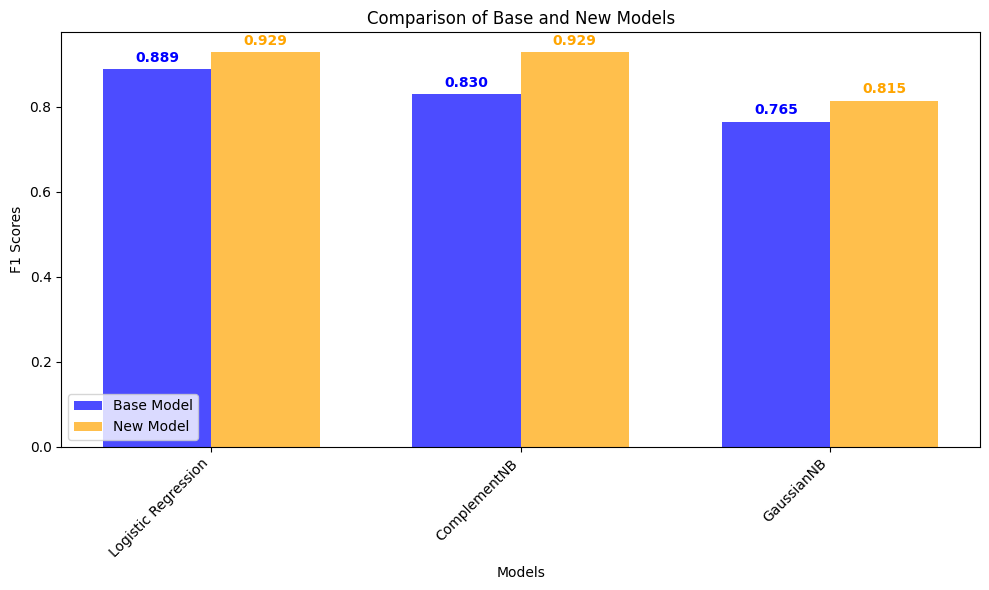

In [277]:
import matplotlib.pyplot as plt
import numpy as np

models = list(base_model_dict.keys())
base_scores = list(base_model_dict.values())
new_scores = list(new_model_dict.values())

bar_width = 0.35
index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(index, base_scores, bar_width, label='Base Model', color='blue', alpha=0.7)
bar2 = ax.bar(index + bar_width, new_scores, bar_width, label='New Model', color='orange', alpha=0.7)

ax.set_xlabel('Models')
ax.set_ylabel('F1 Scores')
ax.set_title('Comparison of Base and New Models')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

# Adding labels on top of the bars
for i, v in enumerate(base_scores):
    ax.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', color='blue', fontweight='bold')

for i, v in enumerate(new_scores):
    ax.text(i + bar_width, v + 0.01, f'{v:.3f}', ha='center', va='bottom', color='orange', fontweight='bold')

ax.legend(loc='lower left')

plt.tight_layout()
plt.show()
